# Step1  Data Cleaning and Preparation


## Loading Data

In [41]:
import pandas as pd
import numpy as np
weather_forecast = pd.read_csv("weather_classification_data.csv")


In [42]:
weather_forecast.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


## Handling Missing Values



In [44]:
weather_forecast.isnull().sum()
w_clean = weather_forecast.dropna(axis=1)
weather_fill = weather_forecast.fillna('unknown')






In [45]:
weather_fill.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


##  DataTransformation

In [46]:
from sklearn.preprocessing import LabelEncoder


le_season = LabelEncoder()
weather_fill['Season'] = le_season.fit_transform(weather_fill['Season'])


weather_fill = pd.get_dummies(weather_fill, columns=['Cloud Cover', 'Location', 'Weather Type'])

print(weather_fill)


       Temperature  Humidity  Wind Speed  Precipitation (%)  \
0             14.0        73         9.5               82.0   
1             39.0        96         8.5               71.0   
2             30.0        64         7.0               16.0   
3             38.0        83         1.5               82.0   
4             27.0        74        17.0               66.0   
...            ...       ...         ...                ...   
13195         10.0        74        14.5               71.0   
13196         -1.0        76         3.5               23.0   
13197         30.0        77         5.5               28.0   
13198          3.0        76        10.0               94.0   
13199         -5.0        38         0.0               92.0   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  \
0                   1010.82         2       3              3.5   
1                   1011.43         7       1             10.0   
2                   1018.72         5       1

## Splitting Data into training and testing


In [47]:
from sklearn.model_selection import train_test_split
 


X_weather = weather_fill.drop(columns=['Weather Type_Sunny'])
y_weather = weather_fill['Weather Type_Sunny']


X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)


print(X_train_weather.head())
print('\n\n\n\n\n')
print(X_test_weather.head())


      Temperature  Humidity  Wind Speed  Precipitation (%)  \
3958         32.0        66         6.0               92.0   
2239         15.0        96        11.0               57.0   
3608         28.0        58         6.5               11.0   
6848         47.0        84        44.5               85.0   
6119         18.0        66        14.0               10.0   

      Atmospheric Pressure  UV Index  Season  Visibility (km)  \
3958               1010.21         2       1              1.5   
2239               1016.98         0       0              4.0   
3608               1025.37        10       2              9.0   
6848                992.26         2       3              2.0   
6119               1000.04         1       0              8.0   

      Cloud Cover_clear  Cloud Cover_cloudy  Cloud Cover_overcast  \
3958                  0                   0                     0   
2239                  0                   0                     1   
3608                  1      

# Step 2 Data Analysis and Visualisation


## Exploratory Data Analysis (EDA):

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Weather Summary")
print(weather_fill.describe(include = 'all'))


Weather Summary
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index        Season  Visibility (km)  \
count          13200.000000  13200.000000  13200.000000     13200.000000   
mean            1005.827896      4.005758      1.849394         5.462917   
std               37.199589      3.856600      1.164824         3.371499   
min              800.120000      0.000000      0.

### Weather

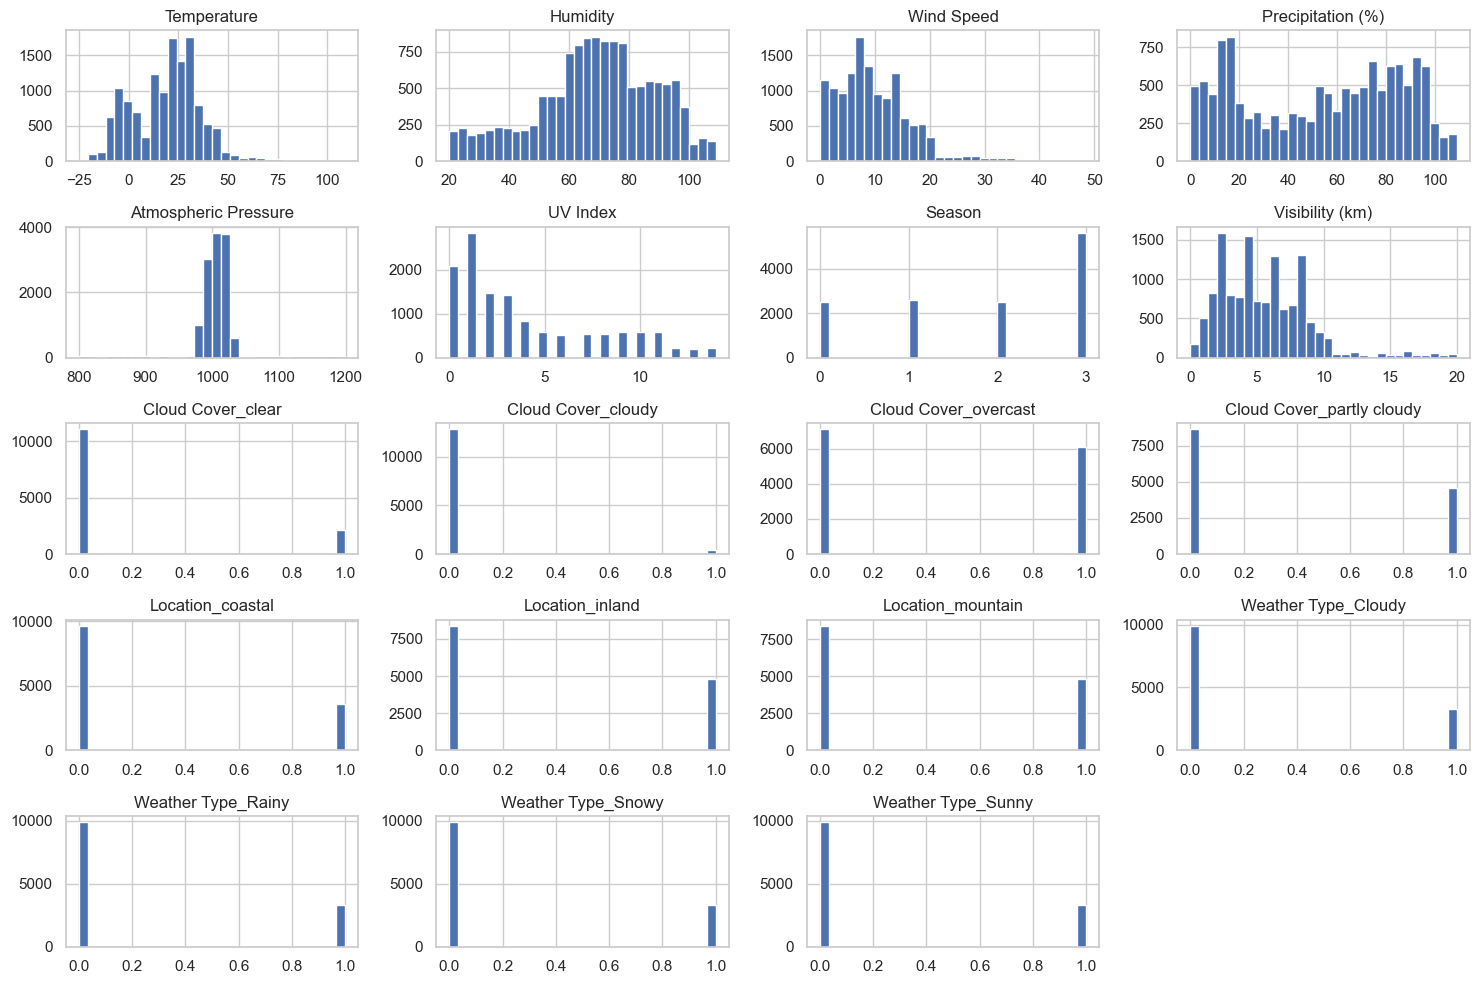

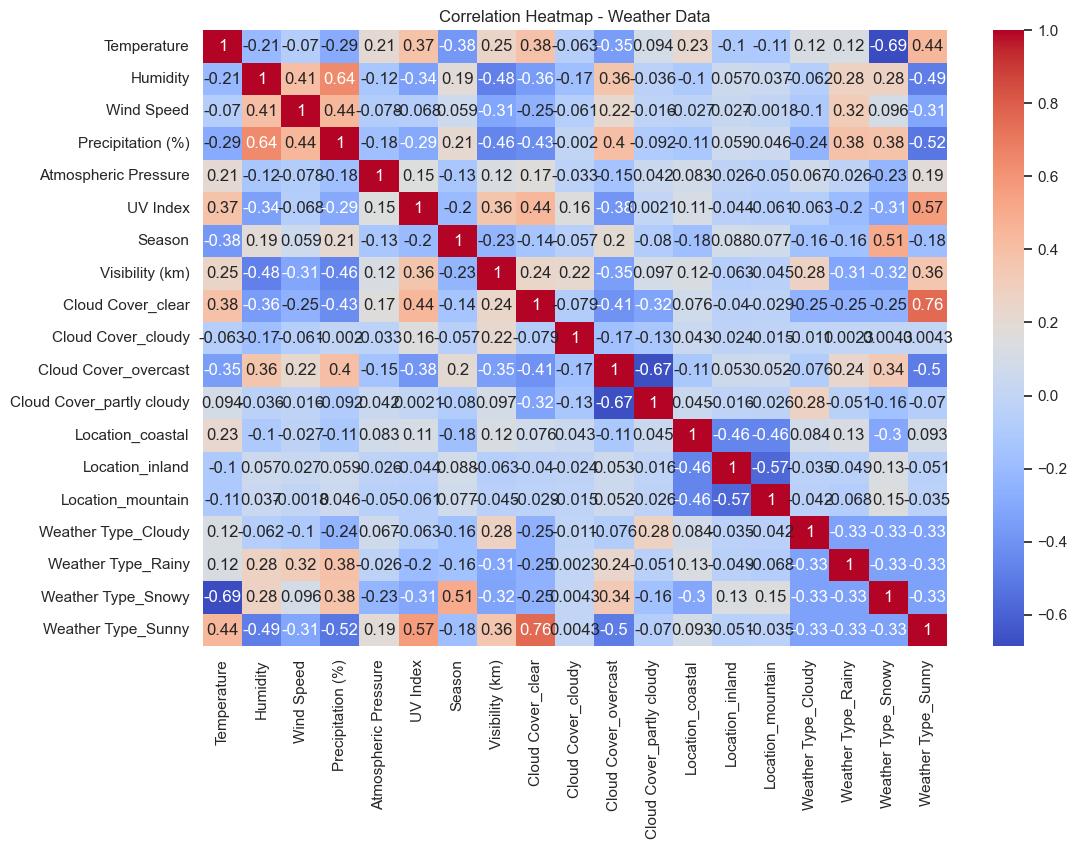

In [49]:
weather_fill.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(weather_fill.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Weather Data')
plt.show()





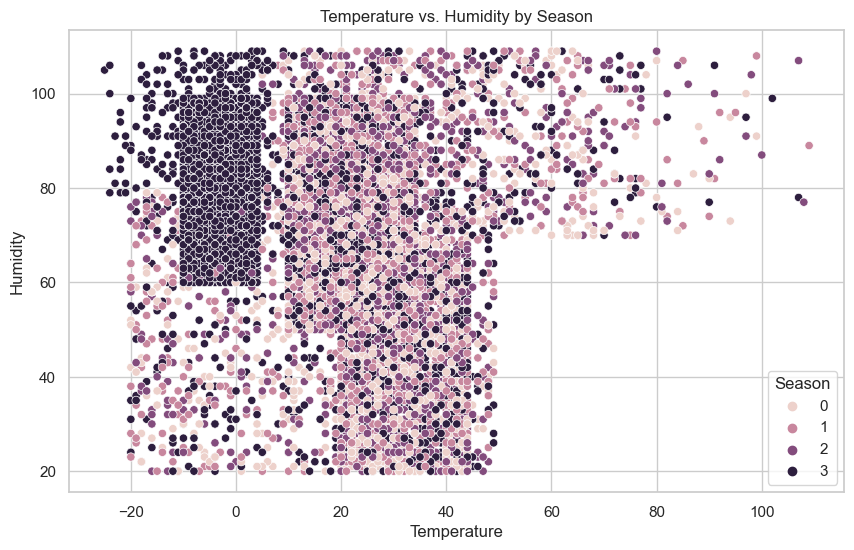

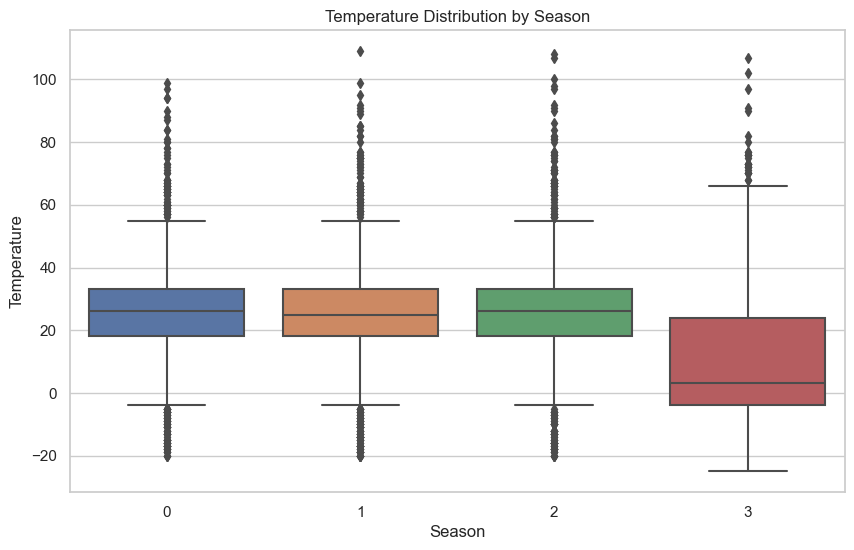

In [50]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_fill, x='Temperature', y='Humidity', hue='Season')
plt.title('Temperature vs. Humidity by Season')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_fill, x='Season', y='Temperature')
plt.title('Temperature Distribution by Season')
plt.show()


## Visualisation

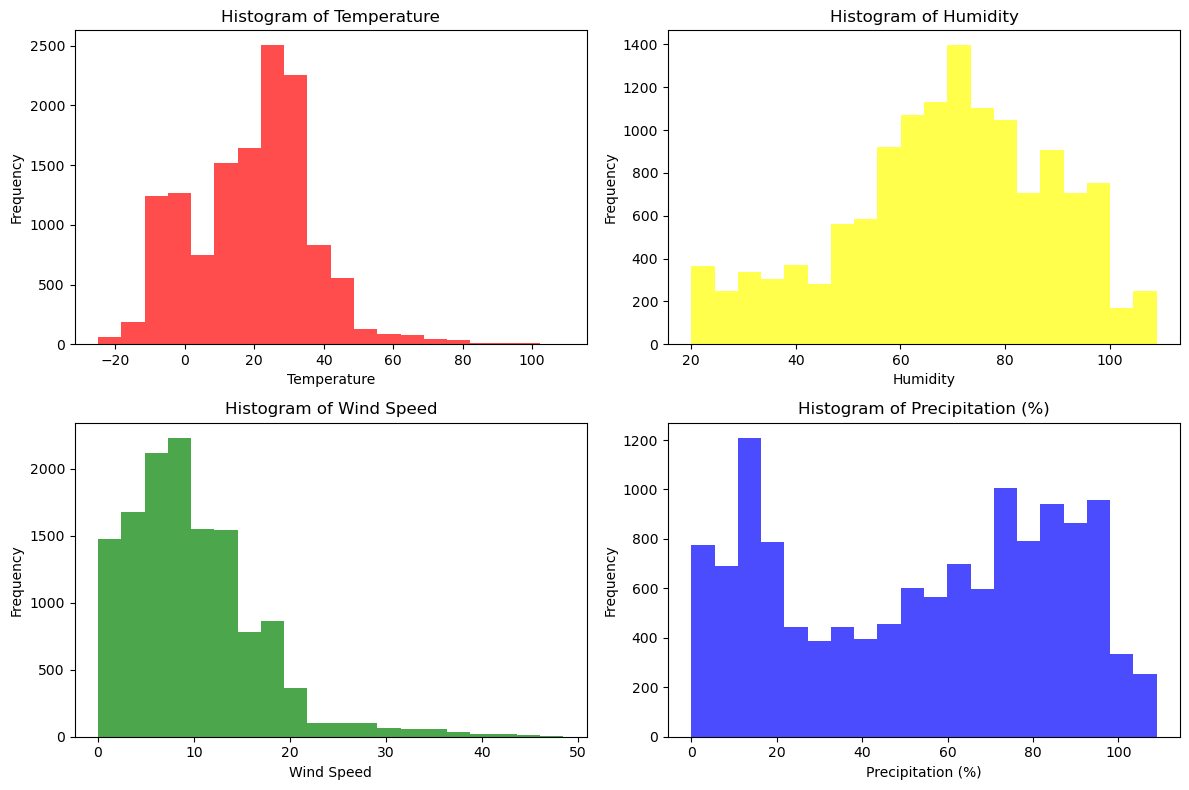

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(weather_fill['Temperature'], bins=20, color='red', alpha=0.7)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(weather_fill['Humidity'], bins=20, color='yellow', alpha=0.7)
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(weather_fill['Wind Speed'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(weather_fill['Precipitation (%)'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Precipitation (%)')
plt.xlabel('Precipitation (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Machine Learning Model

## Logistic Regression: 
Appropriate for binary classification applications such as categorical weather type prediction (if numerically encoded). It is simple to understand, gives probabilities of class membership, and performs well with data that can be linearly separated.

## Decision Tree:
Decision trees are adaptable, proficient in managing non-linear relationships, and capable of capturing intricate feature interactions. They are helpful for figuring out which weather features have the greatest influence because they are simple to grasp and depict.

## Random Forest:
Decision trees are outperformed by random forests in terms of accuracy and overfitting reduction. Because they include forecasts from several decision trees, they are reliable and well-suited to managing complex meteorological data sets.


In [51]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_weather, X_test_weather, y_train_weather, y_test_weather are defined correctly

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}
performance_metrics = {}

for name, model in models.items():
    a
    model.fit(X_train_weather, y_train_weather)
    y_pred = model.predict(X_test_weather)
    
    accuracy = accuracy_score(y_test_weather, y_pred)
    report = classification_report(y_test_weather, y_pred, output_dict = True)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1999.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 641.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2640.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2640.0}}

Model: Decision Tree
Accuracy: 0.9951
Classification Report:
{'0': {'precision': 0.9974949899799599, 'recall': 0.9959979989994997, 'f1-score': 0.9967459324155195, 'support': 1999.0}, '1': {'precision': 0.9875776397515528, 'recall': 0.9921996879875195, 'f1-score': 0.9898832684824903, 'support': 641.0}, 'accuracy': 0.9950757575757576, 'macro avg': {'precision': 0.9925363148657563, 'recall': 0.9940988434935096, 'f1-score': 0.9933146004490049, 'support': 2640.0}, 'weighted avg': {'precision': 0.9950870272919262, 'recall': 0.9950757575757576, 'f1-score': 0.9950796568166287, 'support': 2640.

# Step 4 Model Evaluation and Comparison


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00       641

    accuracy                           1.00      2640
   macro avg       1.00      1.00      1.00      2640
weighted avg       1.00      1.00      1.00      2640


Model: Decision Tree
Accuracy: 0.9951
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.99      0.99      0.99       641

    accuracy                           1.00      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       1.00      1.00      1.00      2640


Model: Random Forest
Accuracy: 0.9992
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00   

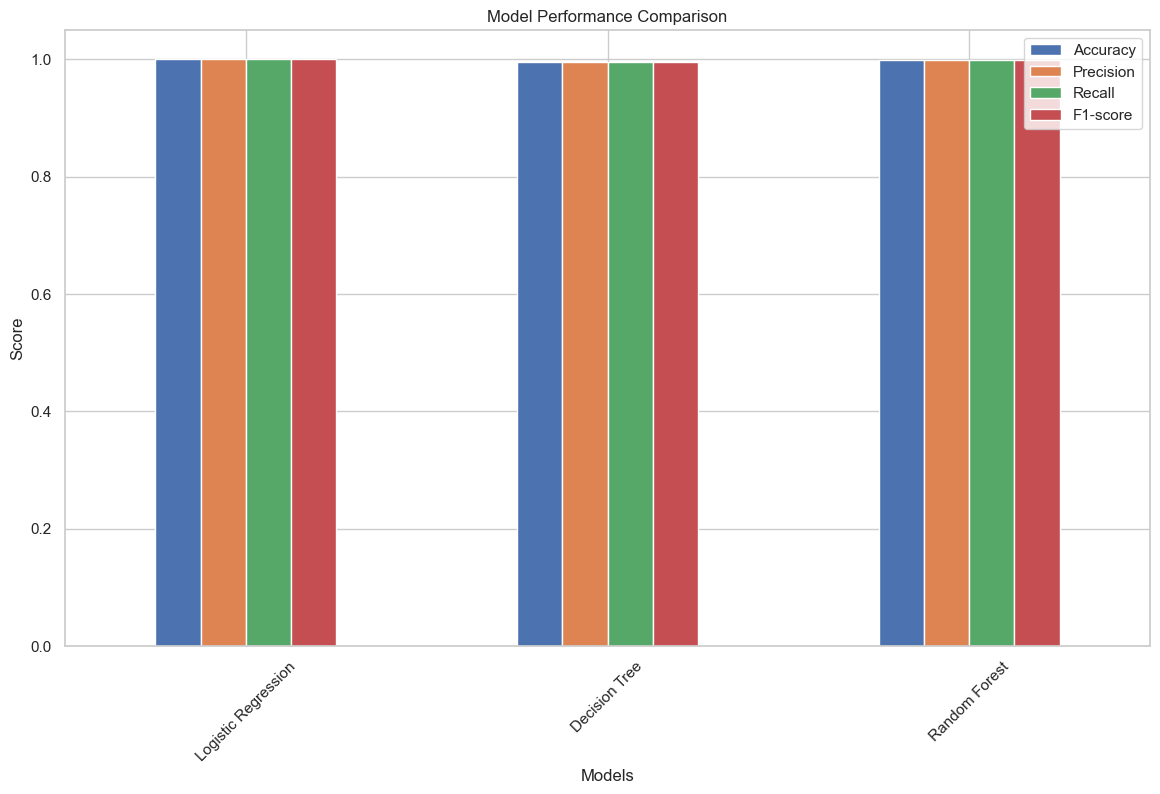

In [52]:
performance_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_weather, y_train_weather)
    y_pred = model.predict(X_test_weather)
    
    accuracy = accuracy_score(y_test_weather, y_pred)
    report = classification_report(y_test_weather, y_pred, output_dict=True)
   
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }
    
   
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test_weather, y_pred)}\n")


metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df)


sns.set(style="whitegrid")


metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

# Conclusion:
Logistic Regression achieved a perfect classification, so it performed the best.
Random Forest is very close behind and may generalize well for larger or more complex datasets due to its nature of averaging across many trees.
Decision Tree still performed well but is less accurate than both the other models.